In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [2]:
sns.set_theme()

In [3]:
df_planted_area = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/planted_area.csv').drop(columns='Unnamed: 0')
df_fires = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv').drop(columns=['latitude', 'longitude', 'month'])
df_fires.head()

,year,state,firespots
0,1999,AMAZONAS,3
1,1999,MARANHAO,36
2,1999,MATO GROSSO,18
3,1999,PARA,87
4,1999,RONDONIA,1


In [4]:
df_fires = df_fires.groupby(['year', 'state']).sum().copy()

In [5]:
df_fires_new = pd.DataFrame(columns=['Year', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS'])
fire_states = ['ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS']

In [6]:
df_fires_new['Year'] = np.array(range(1999, 2020))

In [7]:
df_fires_new


,Year,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for year in range(1999, 2020):
    aux = []
    for state in fire_states:
        aux.append(df_fires.loc[year].loc[state][0])
    aux = [year] + aux
    df_fires_new[df_fires_new['Year'] == year] = np.array(aux)

In [9]:
df_fires_new.columns = ['Year', 'AC', 'AP', 'AM', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']
df_fires_new.head()

,Year,AC,AP,AM,MA,MT,PA,RO,RR,TO
0,1999,347,101,1048,4136,28538,20478,7121,220,869
1,2000,430,253,857,4500,17242,18201,5505,362,818
2,2001,829,1300,1297,7979,20795,28590,5062,2415,1408
3,2002,7985,3730,10203,20848,79680,106849,39132,2845,2601
4,2003,10523,2516,10191,12036,50713,53040,30533,3987,861


In [10]:
estados = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states_area = df_planted_area[['Year', 'Grain']].copy()
for estado in estados:
    df_states_area[estado] = df_planted_area.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)
df_states_area.head()

,Year,Grain,AC,AM,AP,MA,MT,PA,RR,RO,TO
0,1974,Sorghum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1974,Wheat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1975,Sorghum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1975,Wheat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1976,Sorghum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_group_area = df_states_area.groupby('Year').sum().drop(index=range(1974,2004)).copy()
df_group_fires = df_fires_new.groupby('Year').sum().drop(index=range(1999, 2004)).copy()

In [14]:
df_amazon = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv')
df_amazon.set_index('Ano/Estados', inplace=True)
df_amazon.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano/Estados,,,,,,,,,,
2004,728,1232,46,755,11814,8870,3858,311,158,27772
2005,592,775,33,922,7145,5899,3244,133,271,19014
2006,398,788,30,674,4333,5659,2049,231,124,14286
2007,184,610,39,631,2678,5526,1611,309,63,11651
2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [30]:
df_group_area_left = df_group_area.loc[:2016].copy()
df_group_area_right = df_group_area.loc[2017:].copy()

df_group_fires_left = df_group_fires.loc[:2016].copy()
df_group_fires_right = df_group_fires.loc[2017:].copy()

df_amazon_left = df_amazon.loc[:2016].copy()
df_amazon_right = df_amazon.loc[2017:].copy()

#Correlações através dos anos entre a área plantada com: área plantada e números de queimadas

In [99]:
corr_fires_left = df_group_area_left.corrwith(df_group_fires_left, axis=0).copy()
corr_fires_right = df_group_area_right.corrwith(df_group_fires_right, axis=0).copy()
corr_fires_total = df_group_area.corrwith(df_group_fires, axis=0).copy()

corr_amazon_left = df_group_area_left.corrwith(df_amazon_left, axis=0).copy()
corr_amazon_right = df_group_area_right.corrwith(df_amazon_right, axis=0).copy()
corr_amazon_total = df_group_area.corrwith(df_amazon, axis=0).copy()

In [104]:
corr_fires_total

AC    0.256177
AM   -0.014136
AP   -0.163669
MA   -0.753269
MT   -0.598840
PA   -0.437380
RR    0.471312
RO   -0.571882
TO   -0.419776
dtype: float64

In [105]:
corr_amazon_total

AC           0.083129
AM          -0.406421
AP          -0.553155
MA          -0.809872
MT          -0.520343
PA          -0.353993
RR           0.179666
RO          -0.437772
TO          -0.539607
AMZ LEGAL         NaN
dtype: float64

In [109]:
def plot_series(data, title):
    sns.barplot(x=data.index, y=data.values)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylim((-1,1))
    plt.show()

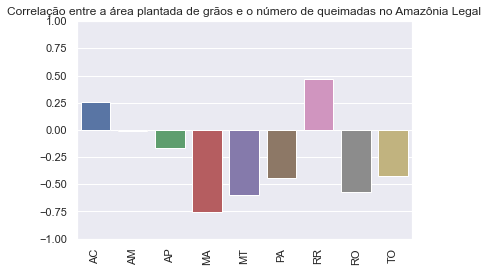

In [110]:
plot_series(corr_fires_total, 'Correlação entre a área plantada de grãos e o número de queimadas no Amazônia Legal')

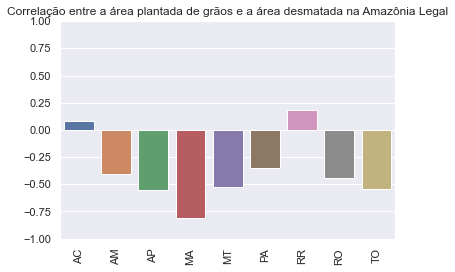

In [112]:
plot_series(corr_amazon_total[:-1], 'Correlação entre a área plantada de grãos e a área desmatada na Amazônia Legal')

Como podemos ver dos gráficos e dos valores da correlação, ela é em geral negativa para a maioria dos estados em ambas situações, e também tem valores parecidos para o mesmo estado.

#Teste de hipótese:
* **Hipótese nula**: as diferenças entre a correlação da área plantada e do número de queimadas/área desmatada podem ser devido ao acaso.
* **Hipótese a ser testada**: essas diferenças podem ser atribuídas à ideologia do governo.

In [37]:
def bootstrap_mean_ab(df1, df2, n=10000):
    size1 = len(df1.columns)
    size2 = len(df2.columns)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1.sample(size1, replace=True, random_state=i)
        sample2 = df2.sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean().iloc[0]
        values2[i] = sample2.mean().iloc[0]
        values_diff[i] = sample1.mean().iloc[0] - sample2.mean().iloc[0]
    return values1, values2, values_diff

In [88]:
v_right_amazon, v_left_amazon, v_diff_amazon = bootstrap_mean_ab(pd.DataFrame(corr_amazon_right), pd.DataFrame(corr_amazon_left))

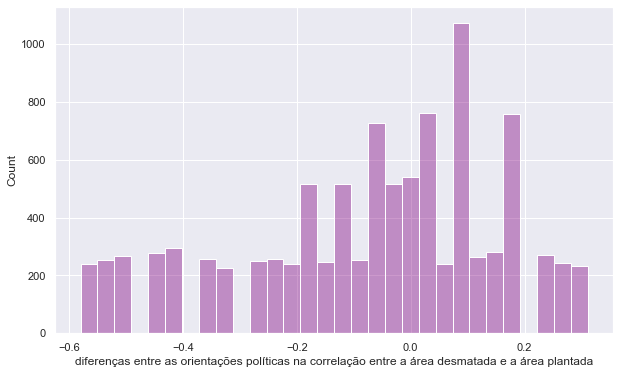

In [89]:
fig = plt.figure(figsize=(10,6))
sns.histplot(v_diff_amazon, bins=30, alpha=0.4, color="purple")
plt.xlabel("diferenças entre as orientações políticas na correlação entre a área desmatada e a área plantada")
plt.show()

In [90]:
v_right_fires, v_left_fires, v_diff_fires = bootstrap_mean_ab(pd.DataFrame(corr_fires_right), pd.DataFrame(corr_fires_left))

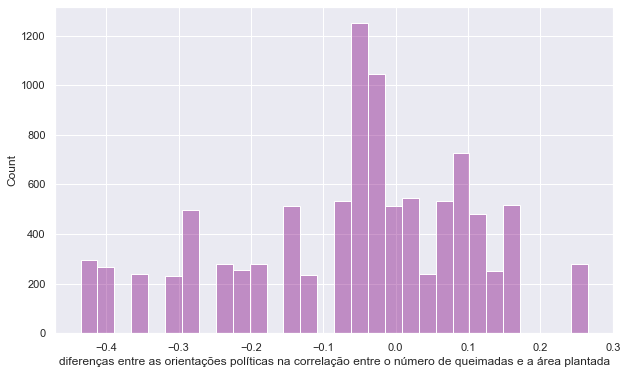

In [91]:
fig = plt.figure(figsize=(10,6))
sns.histplot(v_diff_fires, bins=30, alpha=0.4, color="purple")
plt.xlabel("diferenças entre as orientações políticas na correlação entre o número de queimadas e a área plantada")
plt.show()

Não podemos rejeitar a hipótese nula em nenhuma dessas situações. Nada indica que a ideologia política do partido do presidente afeta a correlação entre a área plantada de grãos e o número de queimadas/área desmatada durante seu mandato.

##Análise das correlações dos estados
Como foi visto nos gráficos acima sobre a correlação, o estado que tem seu valor mais alto em ambas situações foi o Maranhão:

In [115]:
df_MA = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Queimadas'])
df_MA['Área desmatada'] = df_amazon['MA']
df_MA['Queimadas'] = df_group_fires['MA']
df_MA['Área plantada'] = df_group_area['MA']

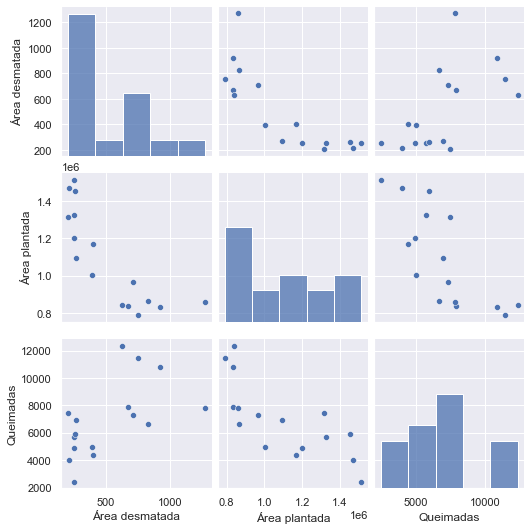

In [116]:
sns.pairplot(df_MA)

In [118]:
queimadas_MA = df_MA['Queimadas']
desmatada_MA = df_MA['Área desmatada']
plantada_MA = df_MA['Área plantada']
lr1_MA = ss.linregress(plantada_MA, desmatada_MA)
lr2_MA = ss.linregress(plantada_MA, queimadas_MA)
r2_MA_desmatada = round(lr1_MA.rvalue**2, 3)
r2_MA_queimadas = round(lr2_MA.rvalue**2, 3)
'Valores de R2 para o Maranhão:', r2_MA_desmatada, r2_MA_queimadas

('Valores de R2 para o Maranhão:', 0.656, 0.567)

Text(0.5, 1.0, 'Regressão linear entre a área plantada e a área desmatada no Maranhão')

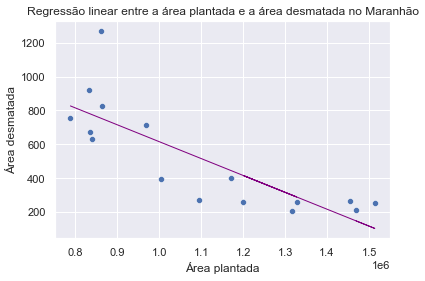

In [120]:
sns.scatterplot(x=plantada_MA, y=desmatada_MA)
y_hat_desmatada_MA = lr1_MA.slope * plantada_MA + lr1_MA.intercept
plt.plot(plantada_MA, y_hat_desmatada_MA, color="purple")
plt.title('Regressão linear entre a área plantada e a área desmatada no Maranhão')

Text(0.5, 1.0, 'Regressão linear entre a área plantada e o número de queimadas no Maranhão')

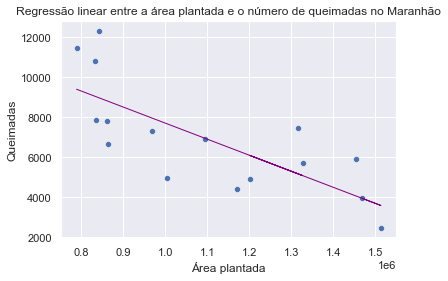

In [121]:
sns.scatterplot(x=plantada_MA, y=queimadas_MA)
y_hat_queimadas_MA = lr2_MA.slope * plantada_MA + lr2_MA.intercept
plt.plot(plantada_MA, y_hat_queimadas_MA, color="purple")
plt.title('Regressão linear entre a área plantada e o número de queimadas no Maranhão')

### Análise para todos estados entre a área plantada e área desmatada:

In [198]:
df_all = []
for estado in estados:
    df_ = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Queimadas', 'Esquerda/Direita'])
    df_['Área desmatada'] = df_amazon[estado]
    df_['Queimadas'] = df_group_fires[estado]
    df_['Área plantada'] = df_group_area[estado]
    df_
    df_all.append(df_)

In [199]:
for i in range(len(df_all)):
    df_all[i].reset_index(inplace=True)
    df_all[i].columns = ['Anos', 'Área desmatada', 'Área plantada', 'Queimadas', 'Esquerda/Direita']

In [214]:
for i in range(len(df_all)):
    df_all[i].loc[df_all[i]['Anos'] <= 2016, 'Esquerda/Direita'] = 'Esquerda'
    df_all[i].loc[df_all[i]['Anos'] >= 2017, 'Esquerda/Direita'] = 'Direita'

In [185]:
lr_all_desmatada = []
lr_all_queimadas = []
for i in range(len(estados)):
    lr_all_desmatada.append(ss.linregress(df_all[i]['Área plantada'], df_all[i]['Área desmatada']))
    lr_all_queimadas.append(ss.linregress(df_all[i]['Área plantada'], df_all[i]['Queimadas']))

In [154]:
def subplots_reg(col, lr, title, color):
    fig = plt.figure(figsize=(15,10))
    gs = fig.add_gridspec(3,3)
    plt.rcParams['lines.linewidth'] = 3
    for i in range(len(estados)):
        fig.add_subplot(gs[i//3, i%3])
        sns.scatterplot(x=df_all[i]['Área plantada'], y=df_all[i][col])
        y_hat = lr[i].slope * df_all[i]['Área plantada'] + lr[i].intercept
        plt.plot(df_all[i]['Área plantada'], y_hat, color=color)
        plt.tight_layout()
        plt.suptitle(title)
        plt.title(f'{estados[i]} (R^2: {round(lr[i].rvalue**2, 2)})')


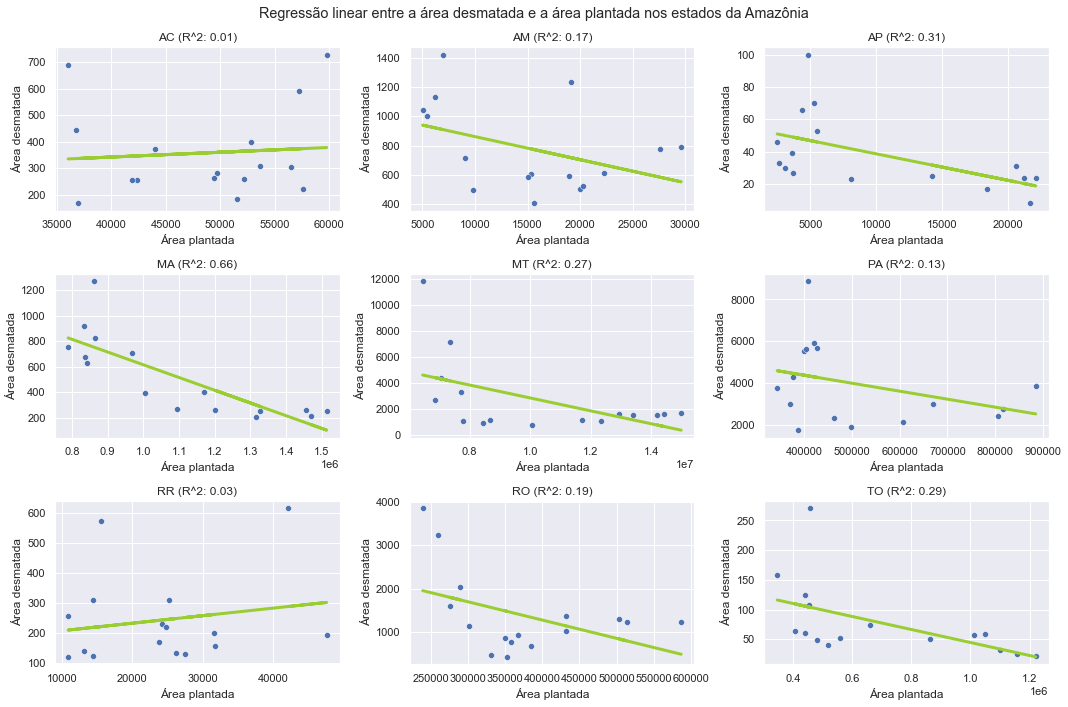

In [186]:
subplots_reg('Área desmatada', lr_all_desmatada, 'Regressão linear entre a área desmatada e a área plantada nos estados da Amazônia', 'yellowgreen')

### Análise para todos estados entre a área plantada e o número de queimadas:

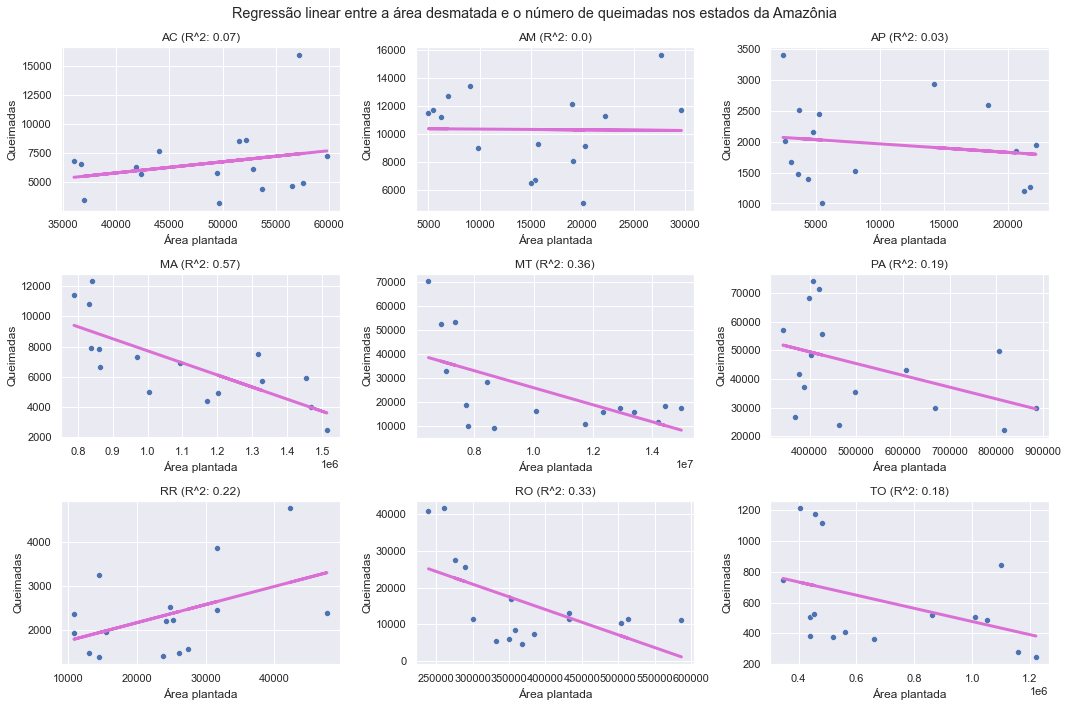

In [156]:
subplots_reg('Queimadas', lr_all_queimadas, 'Regressão linear entre a área desmatada e o número de queimadas nos estados da Amazônia', 'orchid')


In [166]:
df_all_left = []
df_all_right = []
for i in range(len(df_all)):
    df_all_left.append(df_all[i].loc[:2016])
    df_all_right.append(df_all[i].loc[2017:])

###Fazendo as regressões apenas com os dados da esquerda:

In [168]:
lr_esquerda_desmatada = []
lr_esquerda_queimadas = []
for i in range(len(estados)):
    lr_esquerda_desmatada.append(ss.linregress(df_all_left[i]['Área plantada'], df_all_left[i]['Área desmatada']))
    lr_esquerda_queimadas.append(ss.linregress(df_all_left[i]['Área plantada'], df_all_left[i]['Queimadas']))

In [236]:
def subplots_reg_color(col, lr, title, color):
    fig = plt.figure(figsize=(15,10))
    gs = fig.add_gridspec(3,3)
    plt.rcParams['lines.linewidth'] = 3
    for i in range(len(estados)):
        fig.add_subplot(gs[i//3, i%3])
        sns.scatterplot(x=df_all[i]['Área plantada'], y=df_all[i][col], hue=df_all[i]['Esquerda/Direita'], legend='brief')
        y_hat = lr[i].slope * df_all[i]['Área plantada'] + lr[i].intercept
        plt.plot(df_all[i]['Área plantada'], y_hat, color=color)
        plt.tight_layout()
        plt.suptitle(title)
        plt.title(f'{estados[i]} (R^2: {round(lr[i].rvalue**2, 2)})')

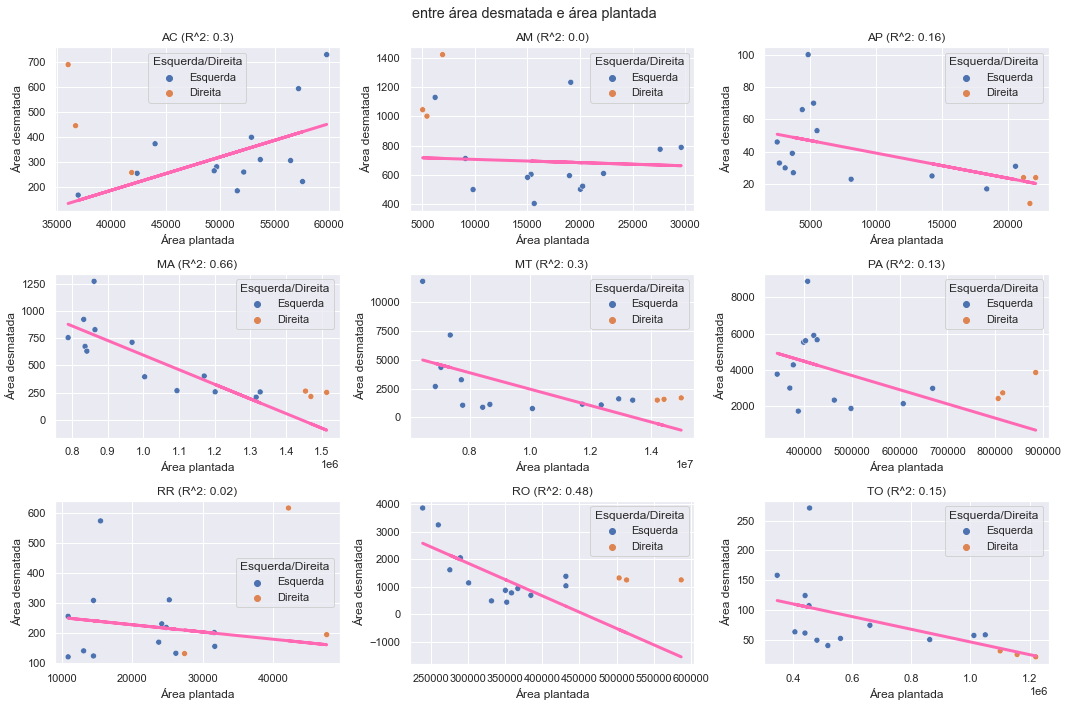

In [237]:
# regressão feita apenas nos dados da esquerda, e plots feitos com todos os dados
subplots_reg_color('Área desmatada', lr_esquerda_desmatada, 'entre área desmatada e área plantada', 'hotpink')

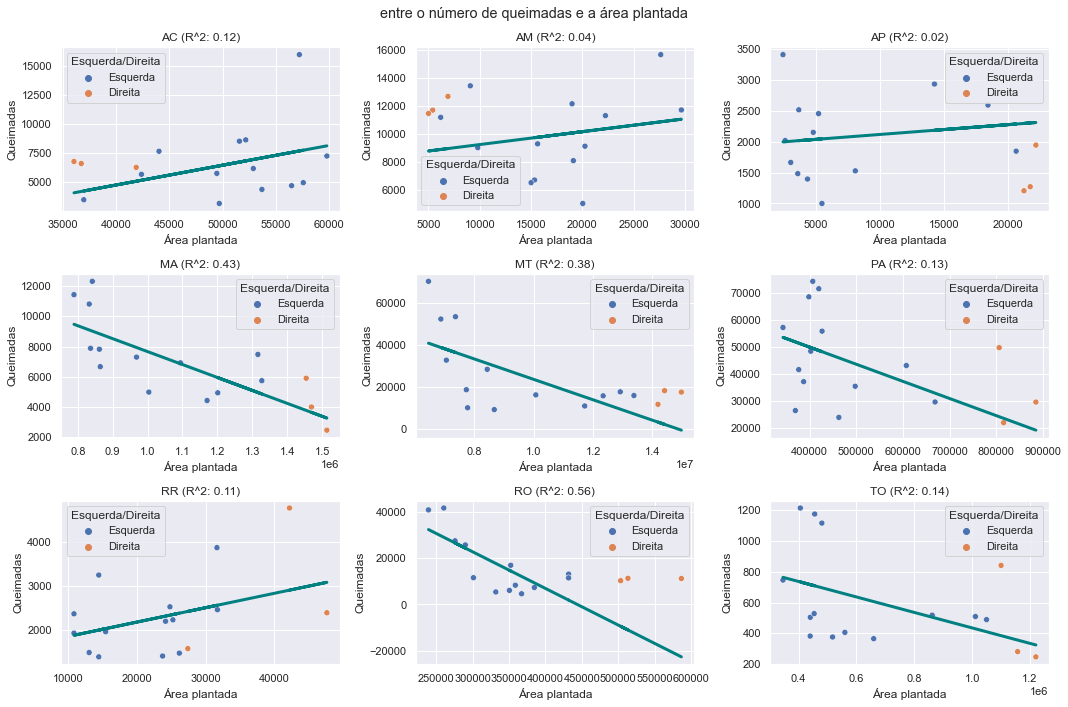

In [238]:
subplots_reg_color('Queimadas', lr_esquerda_queimadas, 'entre o número de queimadas e a área plantada', 'teal')

Observando as diferenças entre a reta da regressão linear e os pontos verdadeiros do scatterplot, podemos concluir:
* Para alguns estados com o R^2 alto, como Rondônia, os pontos da direita parecem estar indo contra a tendência da esquerda (de queda).